# Multiple Disease Prediction

## PARKINSON

In [35]:
import pandas as pd
import numpy as np

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
# Loading Data
parkinson_data = pd.read_csv('parkinsons.csv')
parkinson_data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [38]:
parkinson_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [39]:
parkinson_data.shape

(195, 24)

In [40]:
parkinson_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

## Data Cleaning

In [41]:
# checking for missing values in each column
parkinson_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [42]:
#checking for duplicte values
parkinson_data.duplicated().value_counts()

False    195
Name: count, dtype: int64

## Exploratory Data Analysis(EDA)

In [43]:
# getting some statistical measures about the data
parkinson_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [44]:
# distribution of TARGET Variable

parkinson_data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [45]:
# grouping the data based on the target variable

parkinson_data.groupby('status').mean(numeric_only=True)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


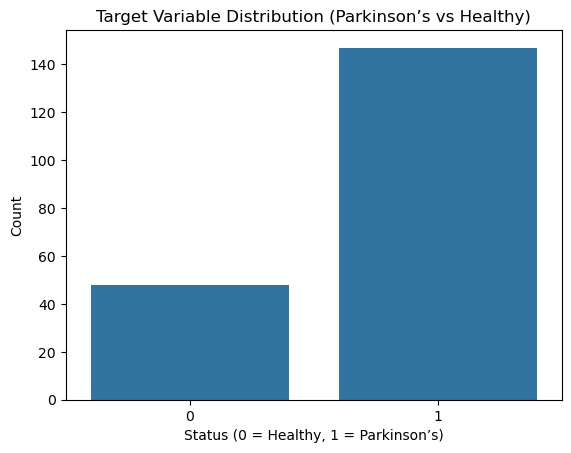

In [46]:
# Target variable distribution (status)

import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot
plt.figure()
sns.countplot(x='status', data=parkinson_data)
plt.title("Target Variable Distribution (Parkinson’s vs Healthy)")
plt.xlabel("Status (0 = Healthy, 1 = Parkinson’s)")
plt.ylabel("Count")
plt.show()


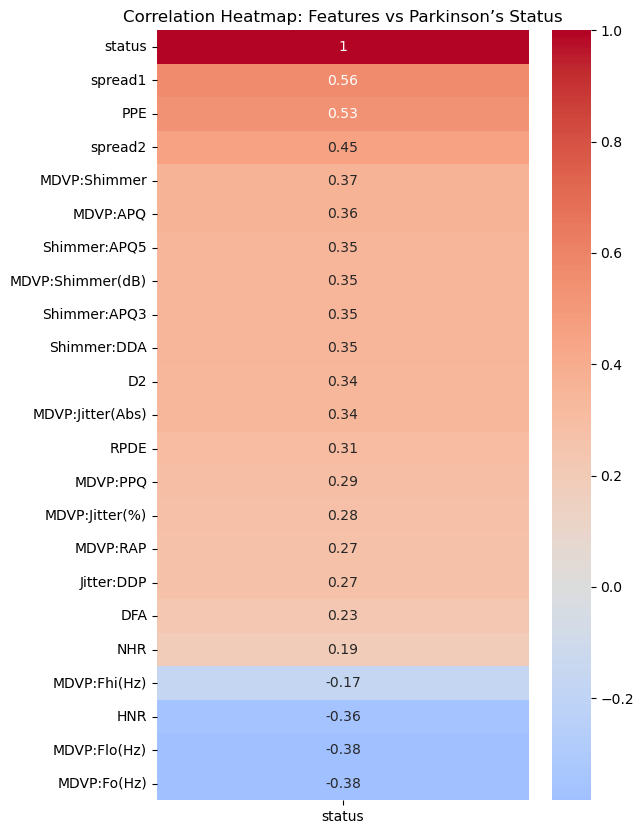

In [47]:
# Droping non-numeric column 
df_corr = parkinson_data.drop(columns=['name'], errors='ignore')

# Correlation with target as DataFrame
target_corr = (
    df_corr
    .corr()[['status']]     # keep 2D structure
    .sort_values(by='status', ascending=False)
)

plt.figure(figsize=(6, 10))
sns.heatmap(
    target_corr,
    annot=True,
    cmap='coolwarm',
    center=0
)

plt.title("Correlation Heatmap: Features vs Parkinson’s Status")
plt.show()


In [48]:
# feature & target

x = parkinson_data.drop(columns=['name','status'], axis=1)
y = parkinson_data['status']

In [49]:
x

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [50]:
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

## Train-test split

In [51]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

## Scaling

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [53]:
# Listing all numeric features

numeric_features = x.columns.tolist()

In [54]:
# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ]
)

## Model Training

In [55]:
!pip install xgboost -q

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

## Logistic Regression

In [57]:
logreg_pipeline = Pipeline([
    ('preprocess', preprocessor), 
    ('model', LogisticRegression(max_iter=1000))
])

# Fit
logreg_pipeline.fit(x_train, y_train)

# Predict
y_pred_logreg = logreg_pipeline.predict(x_test)


# Evaluate
from sklearn.metrics import accuracy_score, f1_score, classification_report
print("---Logistic Regression---")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg, average='weighted'))
print(classification_report(y_test, y_pred_logreg))


---Logistic Regression---
Accuracy: 0.8205128205128205
F1 Score: 0.8243206488143807
              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.90      0.87      0.89        31

    accuracy                           0.82        39
   macro avg       0.73      0.75      0.74        39
weighted avg       0.83      0.82      0.82        39



## K-Nearest Neighbors (KNN)

In [58]:
knn_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', KNeighborsClassifier(n_neighbors=5))
])

# Fit
knn_pipeline.fit(x_train, y_train)

# Predict
y_pred_knn = knn_pipeline.predict(x_test)

# Evaluate
from sklearn.metrics import accuracy_score, f1_score, classification_report
print("---K-Nearest Neighbors (KNN)---")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))
print(classification_report(y_test, y_pred_knn))


---K-Nearest Neighbors (KNN)---
Accuracy: 0.7692307692307693
F1 Score: 0.7865818392134182
              precision    recall  f1-score   support

           0       0.46      0.75      0.57         8
           1       0.92      0.77      0.84        31

    accuracy                           0.77        39
   macro avg       0.69      0.76      0.71        39
weighted avg       0.83      0.77      0.79        39



## Decision Tree 

In [59]:
dt_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))
])

# Fit
dt_pipeline.fit(x_train, y_train)

# Predict
y_pred_dt = dt_pipeline.predict(x_test)

# Evaluate
from sklearn.metrics import accuracy_score, f1_score, classification_report
print("---Decision Tree---")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print(classification_report(y_test, y_pred_dt))


---Decision Tree---
Accuracy: 0.7692307692307693
F1 Score: 0.7896625114016418
              precision    recall  f1-score   support

           0       0.47      0.88      0.61         8
           1       0.96      0.74      0.84        31

    accuracy                           0.77        39
   macro avg       0.71      0.81      0.72        39
weighted avg       0.86      0.77      0.79        39



## Gradient Boosting

In [60]:
gb_pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('model', GradientBoostingClassifier(n_estimators=200, random_state=42))
])

# Fit
gb_pipeline.fit(x_train, y_train)

# Predict
y_pred_gb = gb_pipeline.predict(x_test)

# Evaluate
from sklearn.metrics import accuracy_score, f1_score, classification_report
print("---Gradient Boosting---")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print(classification_report(y_test, y_pred_dt))


---Gradient Boosting---
Accuracy: 0.8205128205128205
F1 Score: 0.7896625114016418
              precision    recall  f1-score   support

           0       0.47      0.88      0.61         8
           1       0.96      0.74      0.84        31

    accuracy                           0.77        39
   macro avg       0.71      0.81      0.72        39
weighted avg       0.86      0.77      0.79        39



## Random Forest

In [61]:
rf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(n_estimators=200, random_state=42))
])
# Fit
rf_pipeline.fit(x_train, y_train)

# Predict
y_pred_rf = rf_pipeline.predict(x_test)

# Evaluate
print("---Random Forest---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))
print(classification_report(y_test, y_pred_rf))

---Random Forest---
Accuracy: 0.7948717948717948
F1 Score: 0.8028490028490028
              precision    recall  f1-score   support

           0       0.50      0.62      0.56         8
           1       0.90      0.84      0.87        31

    accuracy                           0.79        39
   macro avg       0.70      0.73      0.71        39
weighted avg       0.82      0.79      0.80        39



## XGBoost

In [62]:
xgb_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', XGBClassifier(random_state=42))
])
# Fit
xgb_pipeline.fit(x_train, y_train)

# Predict
y_pred_xgb = xgb_pipeline.predict(x_test)
    
# Evaluate
print("---XGBoost---")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb, average='weighted'))
print(classification_report(y_test, y_pred_xgb))

---XGBoost---
Accuracy: 0.8461538461538461
F1 Score: 0.8562334217506631
              precision    recall  f1-score   support

           0       0.58      0.88      0.70         8
           1       0.96      0.84      0.90        31

    accuracy                           0.85        39
   macro avg       0.77      0.86      0.80        39
weighted avg       0.89      0.85      0.86        39



XGBoost ROC-AUC Score: 0.939516129032258


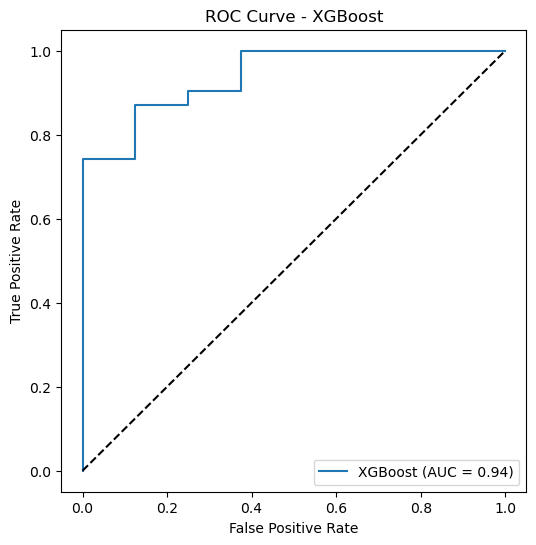

In [64]:
# ROC-AUC comparison

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_xgb = xgb_pipeline.predict_proba(x_test)[:, 1]   # probability for positive class

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_xgb)
print("XGBoost ROC-AUC Score:", roc_auc)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)

# Plot
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')   # random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.show()

## Confusion Matrix

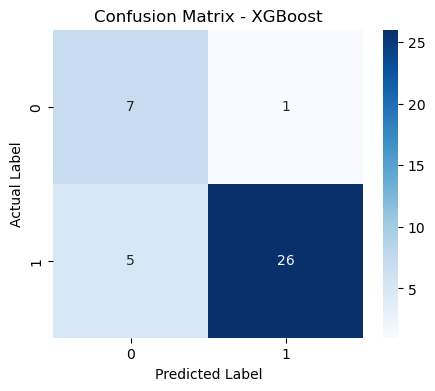

In [65]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred_xgb = xgb_pipeline.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()


## Pickle File

In [66]:
import pickle

# Save the pipeline
with open("xgb_pipeline.pkl", "wb") as f:
    pickle.dump(xgb_pipeline, f)

print("XGBoost pipeline saved successfully!")

XGBoost pipeline saved successfully!
